# Übung 4 - FEM Implementierung Fachwerk

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

import sys, os

from numpy.linalg import solve

## Problemdefinition: Mesh, Materialien, Randbedingungen und Lasten
Hinweis: Hier muss nichts verändert werden

In [2]:
# Spezifizieren der Dateinamen -> Geometriedaten werden in andere Dateien ausgegliedert
nodes_file = "nodes.csv"
elems_file = "elems.csv"
disp_file = "disp.csv"
mat_file = "mat.csv"
force_file = "force.csv"

ndf = 2  # Festlegen der Freiheitsgrade (number degrees of freedom)

# Laden der Materialparameter -> par ist ein Python Dictionary
# jf -> json file
with open(os.path.join("data", "par_prob.json"), 'r') as jf:
    par = json.load(jf)

# Berechnen der Materialparameter der Stäbe -> [EA, sqrt(2)*EA]
# Notwendig, da die Stäbe unterschiedliche Materialparameter besitzen
# Beispiel mat_par[0] -> Materialparameter des Stabes mit Materialnummer 0
mat_par = []
for key in par.keys():
    mat_par.append(par[key]["E"] * par[key]["A"])

# Laden der Materialzuordnung (Index -> Materialparameter ID)
# Beispiel mat[2] -> Materialnummer des Stabs mit ID 2
with open(os.path.join("data", mat_file), "r") as mf:
    mat = [int(l.strip()) for l in mf]

# Laden der Knotenkoordinaten
# Aufbau: nodes = [[x0,y0], [x1,y1], ...]
# Zugriff: nodes[Achse][KnotenID]; 0-> x-Achse, 1-> y-Achse
# Beispiel: nodes[0,1] -> x1; nodes[1,3] -> y3
nodes = np.genfromtxt(os.path.join("data", nodes_file), delimiter=',')

# Laden der Elementdaten (Knotenverbindungen)
# Aufbau: elems = [[KnotenID0, KnotenID1], [KnotenID0, KnotenID1], ...]
# Zugriff: elems[ElementID] -> Knoten ID beider Knoten, die das Element verbindet
elems = []
with open(os.path.join("data", elems_file), "r") as ef:
    for line in ef:
        ids = [int(i) for i in line.strip().split(",")]
        elems.append(ids)

# Laden der externen Kräfte
# Aufbau: ID des Knotens, Freiheitsgrad (0:x, 1:y), Betrag der Kraft
force_nodes = []
with open(os.path.join("data", force_file)) as ff:
    for line in ff:
        sp = line.strip().split(',')
        force_nodes.append([int(sp[0]), int(sp[1]), float(sp[2])])

# Laden der Verschiebungsrandbedingungen (nur gesperrte Verschiebung)
# Aufbau: ID des Knotens, Freiheitsgrad (0:x, 1:y)
disp_nodes = []
with open(os.path.join("data", disp_file), 'r') as bcf:
    for line in bcf:
        sp = line.strip().split(",")
        disp_nodes.append([int(s) for s in sp])

## Aufbau der Finite Element Rechnung

In [3]:
n = len(nodes) # Anzahl der Knoten bestimmen

#TODO: Initialisieren der globalen Stiffness Matrix und des globalen Lastvektors
#       in Abhängigkeit der Anzahl der (gesamt) Knoten und der (gesamt) Freiheitsgrade
#K_glob =
#F_glob =

#Iteration über die Elemente
for elem_id, elem in enumerate(elems):
    # Aufbau der Elementsteifigkeitsmatrix

    #TODO: Berechnung  der Elementlänge
    #dx = 
    #dy = 
    #length = 
    #cos = 
    #sin = 

    #TODO: Aufbau der Elementsteifigkeitsmatrix
    #k_elem = 


    #TODO: Material berücksichtigen
    #k_elem =

    #TODO: Aufbau des Elementresiduums (ohne Volumenkräfte 0)
    #f_elem = 

    #Element Assembly

    for I in range(4):
        for J in range(4):
            #TODO: Koinzidenzschema implementieren
            pass
            #K_glob[X,X] +=
        #F_glob[X] +=

## Einarbeiten der Randbedingungen

In [4]:
# TODO: Kraftrandbedingungen auf der rechten Seite aufbringen
#for fp in force_points:
#    F_glob[X] =

# IDs der Zeilen/Spalten berechnen, bei denen die Verschiebungsrandbedingungen
# (fester Rand) aufgebracht werden
rem_rows = [ndf*bcp[0] + bcp[1] for bcp in disp_nodes]


# TODO: Löschen der Zeilen/Spalten im LGS - glob_red ist reduziertes LGS
#K_glob_red = 
#K_glob_red = 
#F_glob_red = 

#ind ist einfach eine Liste an Indizes von 0 - größe des LGS
ind = np.array([i for i in range(len(nodes)*ndf)])
# hier werden alle gelöschenten Zeilen/Spalten des reduzierten LGS aus ind
# entfernt -> es bleiben so die ursprünglichen Indizes übrig, die noch weiter
# verwendet werden
ind_d = np.delete(ind, rem_rows, 0)

#Initialisierung der kompletten Lösung (inkl. Randbedingungen) als 0-Vektor
result = np.zeros(len(nodes)*ndf)

## Lösen des Linearen Gleichungssystems

In [5]:
#TODO: Auskommentieren
#w = solve(K_glob_red, F_glob_red)
#Hier werden die Lösungen der "freien" Knoten in die Gesamtlösung inkl.
#Randbedingungen eingefügt
#result[ind_d] = w

## post processing (Grafische Ausgabe)

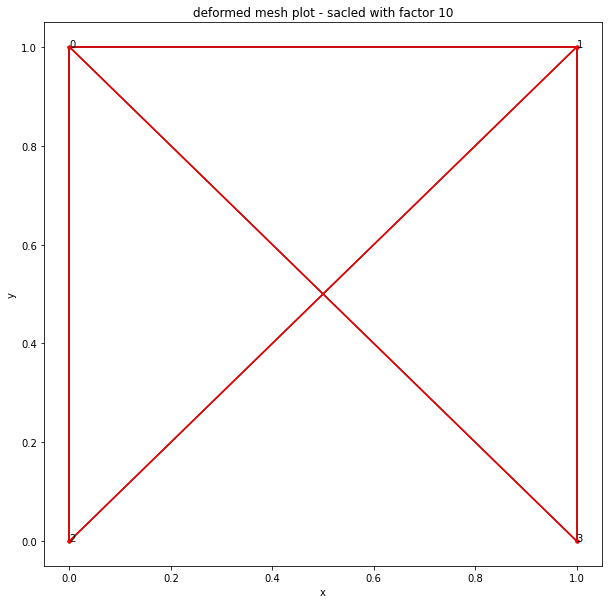

In [6]:
# TODO: Berechnung der Reaktionskräfte
#F_full = K_glob @ result

# Ausgabe der Reatkionskräfte, Indizes können aus Aufgabenstellung abgelesen werden
#print("Reaktion 4: {}, Reaktion 5:{}".format(F_full[4], F_full[5]))
#print("Reaktion 6: {}, Reaktion 7:{}".format(F_full[6], F_full[7]))

# Plot des unverformten Fachwerks
fig, ax = plt.subplots(figsize=(10, 10))
# Plot und Beschriftung der Knoten
ax.plot(nodes[:, 0], nodes[:, 1], '.', c='black')
for i in range(nodes.shape[0]):
    ax.annotate(str(i), (nodes[i, 0], nodes[i, 1]))

# Plot der Elemente (Stäbe)
for i, e in enumerate(elems):
    x = [nodes[e[pi], 0] for pi in [0, 1]]
    y = [nodes[e[pi], 1] for pi in [0, 1]]
    ax.plot(x, y, '-', c='black')

# Plot des Verformten Fachwerks
scale = 10
# Das Ergebnis (die Knotenverschiebungen) werden auf die Ursprungskoordinaten
# der Knoten addiert und zur besseren Visualisierung mit einem Faktor skaliert
nodes_dp = nodes + result.reshape(4,2) * scale
ax.plot(nodes_dp[:, 0], nodes_dp[:, 1], '.', c='red')
for i, e in enumerate(elems):
    x = [nodes_dp[e[pi], 0] for pi in [0, 1]]
    y = [nodes_dp[e[pi], 1] for pi in [0, 1]]
    ax.plot(x, y, '-', c='red')

plt.title("deformed mesh plot - sacled with factor {}".format(scale))
plt.xlabel("x")
plt.ylabel("y")

plt.show()